## Ch 3 Classification
Moving from regression to classification, the focus is moved from predicting a value on a continuous spectrum to predicting a value on a closed spectrum.  This is considered a classification problem where classes are predicted.  There are algorithms which can be used for both, and others which specialize in the classifiation domain.

[Github repo](https://github.com/ageron/handson-ml2)

### Dataset: MNIST
The MNIST dataset is a set of 70000 small images of handwritten digits by highschool students and employees of the US Census Bureau.  Each image if labeled with the digit it represents.  This has been studied so much it is often referred to as the "hello world" of the machine learning space.  It is often used as a baseline test for new classification algorithms. Sklearn offers many helper functions to access datasets, and MNIST is one of the datasets.  

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


In [3]:
from sklearn.datasets import fetch_openml # data get function

In [4]:
mnist = fetch_openml('mnist_784', version=1, parser = 'auto')

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Common datastructure
Sci-Kit learn datastructures are typically dictionaries.  Normally they will contain the following:
- data: An array containing one row per instance and one column per feature
- target: A vector/array containing the labels
- DESCR: description of the dataset.
- The remaining options can be explored for more details.

In [6]:
mnist.frame # returns dataframe of the data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [7]:
mnist.details # structure details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [8]:
X,y = mnist.data, mnist.target
print(X.shape, y.shape)

(70000, 784) (70000,)


In [9]:
examp_digit = X.iloc[0]
examp_digit_reshape = examp_digit.values.reshape(28,28) # cast dataframe to numpy, then call reshape

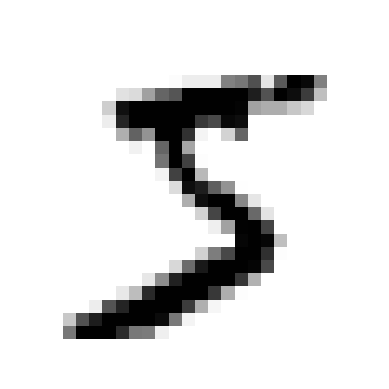

In [10]:
plt.imshow(examp_digit_reshape, cmap='binary')
plt.axis('off')
plt.show()

#### Survey Says
This looks like a 5, and when checking the target, that is the value which matches this handwritting sample.  Note that the label is stored as a string.  Recasting to a number will improve the ingestion for the ML algorithm.

In [11]:
y.iloc[0]

'5'

In [12]:
y = y.astype(np.uint8)

### Create the train test split
This data set was already produced with a distributed train test split for people to leverage if consistantly to test algorthims and workflows.  The first 60_000 items are the training data and the last 10_000 are the test data.  Simply break up the data into the respective groups for the train and test needs for features and targets.  The embedded split has already accounted for distribution and appropriate shuffling so the same digit does not occur many times in a row (something some algorithms are sensative too).

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Create a Binary Classifier
This is a model which only detects one value.  In the case of this effort, that value will be 5.  So it will respond with 5 and not 5 in terms of classification.  This is a single piece of a larger classifier, but it will demonstrate the process for this type of machine learning problem.

In [14]:
y_train_5 = (y_train == 5) # true for all 5s, false in all other cases
y_test_5 = (y_test == 5)

### Stochastic Gradient Descent
This is an algorithm that is very scalable, handles large data well and can be used for online learning.  It deals with training instances one at a time to manage this aspect of the design.  This will be called from the SciKit Learn library.

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([examp_digit])

c:\users\knhoffm\.virtualenvs\hands_on_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

### Performance Measures
Evaluating a classifier is significantly more difficult than evaluating a regressor.  This will require additional terms and acronyms to be understood to consistently understand the state of the model.  

#### Measuring Accuracy Using Cross-Validation
Cross Validation is a good way to understand the performance of a classifier model.  In most instances, this can be accomadated using the sklearn cross_val_score method, but there are cases when a custom built cross_val_score might be required.  This is often a question of the level of control desired on the cross validation process and scoring.

In [18]:
# custom cross val
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [19]:
# # custom cross val
# skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# for train_index, test_index in skfolds.split(X_train, y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train.iloc[train_index]
#     y_train_folds = y_train_5.iloc[train_index]
#     X_test_fold = X_train.iloc[test_index]
#     y_test_fold = y_train_5.iloc[test_index]
    
#     clone_clf.fit(X_train_folds, y_train_folds)
#     y_pred = clone_clf.predict(X_test_fold)
#     n_correct = sum(y_pred == y_test_fold)
#     print(n_correct/len(y_pred))

---
>**NOTE**: It is much easier if the cross_val_score can be used directly to evaluate a model

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
# evaluate the sgd_clf using existing cross_val_score method
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

>**NOTE**: Accuracy looks pretty good, but is it really?
---
So this model is achieving over a 90% hit rate.  That is impressive for the first pass.  To validate that this is actually something significant for this task a simple not a five model will be created to test the cross val for such a system. 

In [22]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [23]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

This demonstrates why accuracy alone may not be enough to understand a models performance.  This is especially true for classifiers where the prediction is not a range of numbers but finite outcomes, often true false booleans or limited ranges of values such as predicting numbers.  

### Confusion Matrix
The confusion matrix is named as such because no matter how often it is reviewed, getting crossed up about the designation for rows and columns is easy to do when some time has passed between uses.  This matrix is designed as a way to compare the true value for a target to its predicted value.  
- The Rows of a confusion matrix are the true values of the data broken into two records, True and False.  This is most helpful in a binary construction.  
    - The first row is all non true values, or not the intended target.  
    - The second row is all true values, or the intended target.  So, if predicting images of the number 5, all instances of those targets would fall in the second row.
- The columns are the predicted value, True or False.  
    - The first column is negative predictions.  The model said it was not the intended target
    - The second column is positive prediction.  The model thought it was the intended target
- The upper left cell are considered the true negative predictions.  Not the target and predicted as such.
- The upper right cell are false positives.  Not the target, but incorrectly predicted as the target
- The low left are false negatives.  The target, but predicted as not the target
- Finally, the lower right are true positives.  The targeted predicted value was predicted as such.  A spade is a spade.

To compute the confusion matrix requires a set of predictions which can be compared to targets.  This must be done on the training set during model evaluation.  Sklearn comes to the rescue with the cross_val_predict function:

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
# creating predictions for confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [26]:
# now the confusion matrix can be obtained
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

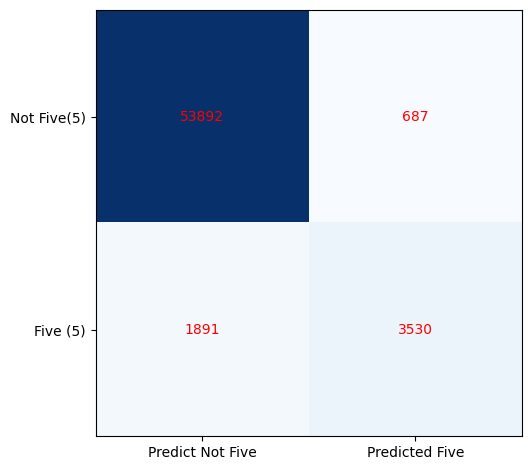

In [28]:
fig,ax = plt.subplots()
matrix = confusion_matrix(y_train_5, y_train_pred)
ax.imshow(matrix, cmap='Blues')

ax.set_yticks(np.arange(len(['Not Five(5)','Five (5)'])), labels=['Not Five(5)','Five (5)'])
ax.set_xticks(np.arange(len(['Predict Not Five', 'Predicted Five'])), labels=['Predict Not Five', 'Predicted Five'])

for i in range(2):
    for j in range(2):
        text = ax.text(j, i, matrix[i, j],
                       ha="center", va="center", color="r")

fig.tight_layout()
plt.show()

### Precision and Recall
Burried within the Matrix are the concepts of precision and recall (also called sensitivity).  These two components of a prediction model are critical to the intended performance.  
- If the model must be correct when making a prediction, precision is paramount. 
- If the model must catch all potential outcomes, then a higher recall or sensitivity is needed.

The math for precision and recall leverage the bottom row (recall) or the right hand column(precision).

$ precision = \frac{TP}{TP + FP}$ This would be 3530/(3530+687) = 83.7%

$ recall = \frac{TP}{TP + FN}$ This would be 3530/(3530+1891) = 65.1% to sensisitive?

Sklearn also has built in functions for these calculations.

In [29]:
from sklearn.metrics import precision_score, recall_score

In [30]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

#### F1 Score
To better understand precision and recall, it is often helpful to combine them into a single metric called the $F_1$ score.  This is specifically helpful if you need a way to compare two classifiers.  The $F_1$ score is the harmonic mean of precision and recall.  The harmonic mean gives more weight to lower values.  As a result, the $F_1$ score will only get a high score (close to 1?) if both precision and recall are high.  Equation for $F_1$

$F_1 = 2 x \frac{precision x recall}{precision + recall} = \frac{Total Positive}{Total Positive + \frac{FalseNegative + False Positive}{2}}$

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

### Decision Functions for precision/recall
Decision function to determine if a classification is a positive (yes this is a match) or negative (no this is not a match) have a trade off.  They leverage a threshold to determine what bucket to place predictions in for the data set.  The decision threshold is not directly accesssible in most cases, but you can evaluate its behavior through calling the decision_function() method, which returns a score for each instance.  This can be compared to any threshold to determine behavior.  The default for the SGDClassifier is 0 (above being positive and below, no surprise, is negative).

In [34]:
pd.DataFrame(examp_digit).value_counts()[:10] # pixel hue values for handwritten 5? 

0      618
253     54
18       5
11       3
154      3
2        3
64       2
1        2
195      2
82       2
Name: count, dtype: int64

In [35]:
y_scores = sgd_clf.decision_function([examp_digit]) # returns confidence scores using examp_digit

y_scores 

c:\users\knhoffm\.virtualenvs\hands_on_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [36]:
threshold = 0 # default threshold, so will match prediction

In [37]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [38]:
threshold = 8000 # updated threshold to test decision, shows five is miss classified with a higher threshold
(y_scores > threshold)

array([False])

### Determining a threshold
This is the test required to determine the best decision_function threshold.  In place of returning cross_validation predictions, the same function can be called to return decision scores.  These scores can be used in a decision recall curve to show how the decision threshold impacts decision and recall. 

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [40]:
from sklearn.metrics import precision_recall_curve

In [41]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [42]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, target=0.9):
    recall_target_precision = recalls[np.argmax(precisions >= target)]
    threshold_target_precision = thresholds[np.argmax(precisions >= target)]
    plt.figure(figsize=(8, 4))
    plt.title(f"Precision vs Recall at {target*100:.0f}% Threshold")
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
    plt.plot(thresholds,precisions[:-1], "b--", label='Precision')
    plt.plot(thresholds,recalls[:-1], "g-", label='Recall')
    plt.plot([threshold_target_precision, threshold_target_precision], [0., target], "r:")
    plt.plot([-50000, threshold_target_precision], [target, target], "r:")
    plt.plot([-50000, threshold_target_precision], [recall_target_precision, recall_target_precision], "r:")
    plt.plot([threshold_target_precision], [target], "ro")
    plt.plot([threshold_target_precision], [recall_target_precision], "ro")
    plt.legend()

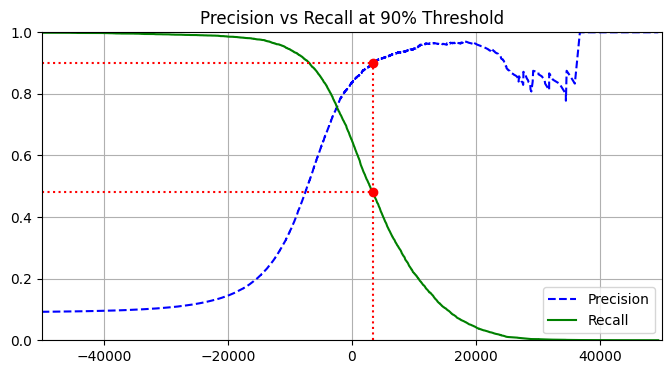

In [43]:
target = 0.9
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, target=target)

Text(0.5, 1.0, 'Precision vs Recall plotting 90% Threshold')

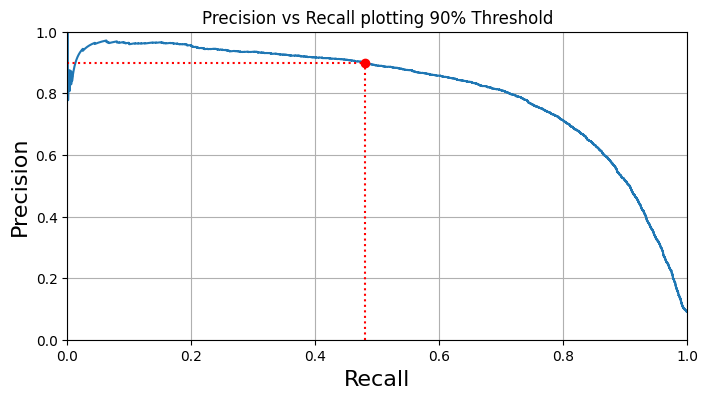

In [44]:
target = 0.9
recall_target_precision = recalls[np.argmax(precisions >= target)]
threshold_target_precision = thresholds[np.argmax(precisions >= target)]
plt.figure(figsize=(8, 4))
plt.plot(recalls, precisions)
plt.plot([recall_target_precision, recall_target_precision], [0., target], "r:")
plt.plot([0.0, recall_target_precision], [target, target], "r:")
plt.plot([recall_target_precision], [target], "ro")
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.grid(True)
plt.title(f"Precision vs Recall plotting {target*100:.0f}% Threshold")


#### Finding the cut off
Based on the above two plots, the determination is made to target a 90% precision since recall is less critical in this instance.  Less false positives in the number identification process is the goal.  Based on this decision, the threshold needs to be determined for the targeted precision.  Using the np.argmax function is the best way to identify this point in the array of values returned from the cross_val_score method.  

In [45]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision # doesn't match book, but does match github data

3370.0194991439557

---
To make predictions, the threshold can be leveraged in a comparison versus the previously determined *y_scores* when the cross_val_scores method returned decision_function values (thresholds).  

In [46]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [47]:
print("Precision: ",precision_score(y_train_5, y_train_pred_90))
print("Recall: ",recall_score(y_train_5, y_train_pred_90))

Precision:  0.9000345901072293
Recall:  0.4799852425751706


>**NOTE**: If a model achieves 99% precision, the first question is what is the recall at this basis.  It is a trade off, and one that should be made with intent (flight security, fraud or junk email require different outcomes).

### The ROC curve
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but plots true positive (recall) versus false positive rate (FPR).  This provides a different view of the same model performance.  The False positive rate (FPR) is equivalent to $1-TNR$ (True Negative Rate).  True negative rate is considered *specificity* of the model.  Hence the ROC curve plots sensitivity vs (1-specificity).  

To plot the ROC curve you must import the roc_curve() function from sklearn, which computes the FPR and TPR for the model in question.

In [48]:
from sklearn.metrics import roc_curve

In [49]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

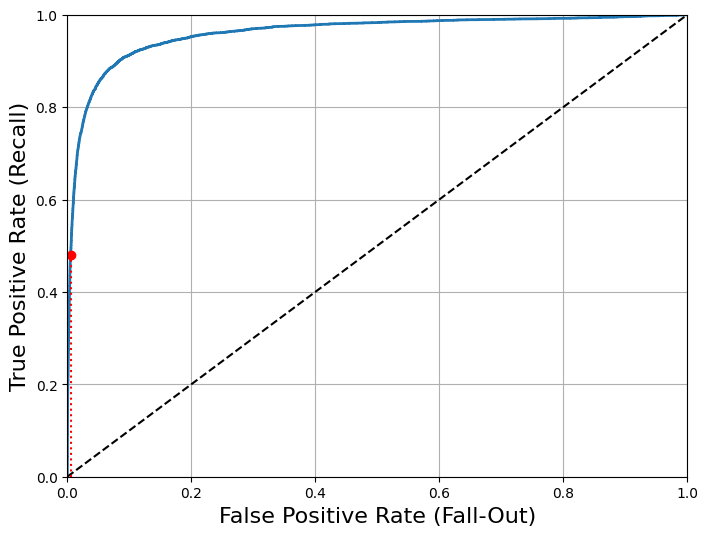

In [50]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_target_precision)]
plt.plot([fpr_90, fpr_90], [0., recall_target_precision], "r:")
plt.plot([0.0, fpr_90], [recall_target_precision, recall_target_precision], "r:")
plt.plot([fpr_90], [recall_target_precision], "ro")

#### Trade Offs
As with the previous discussion leveraging the precision and recall metrics directly, there are trade offs between the two option of True Positive Rate(recall/sensitivity) and False Positive Rate (Fall-Out).  As your TPR (sensitivity) so does your FPR (incorrectly positively classified records) yielding a positive relationship.  One way to identify the performance of a model ROC curve is the area under the curve (AUC) evaluation which scikit learn includes a function to evaluate.  A perfect AUC have a value of 1.0, while a purely randome classifier has a AUC of 0.5. 

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

>**NOTE**:The ROC AUC score looks good in this case.  That said, the ROC curve should really only be applied when conducting a model that needs to produce a more frequent positive case relative to the data. In the case of the example, five is one of ten available digits meaning the positive case is rare.  In low frequency positive case problems, the precision recall curve provides a better indication of model performance.

### Model Comparison using ROC AUC
Adding a Random Forest classifier, the roc_curve and auc score can be compared for each of the two models to determine the level of performance. Due to differences in the random_forest classifer api, there are differences in how the decision_function() method is accessed.  Random_Forest instead has a predict_proba() method to access the same data. Scikit learn generally has one or the other or both.  The predict_proba() method returns an array containing on row per instances and a column per class, each containing the probability that the given instance belongs to the given class (e.g. 70% chance that the image represents a 5).

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [55]:
pd.DataFrame(y_probas_forest).sample(3)

,0,1
2155,1.00,0.00
22614,0.98,0.02
46963,0.93,0.07


In [56]:
y_scores_forest = y_probas_forest[:,1] # score probability of the positive class

In [57]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

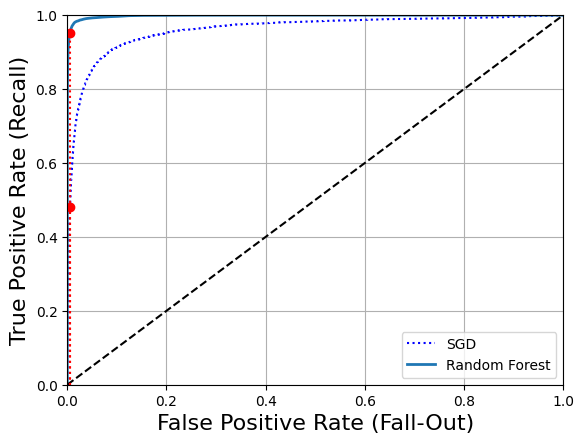

In [58]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_target_precision], "r:")
plt.plot([0.0, fpr_90], [recall_target_precision, recall_target_precision], "r:")
plt.plot([fpr_90], [recall_target_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [59]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

#### Scoring
As is evident in the graphic, the auc is much better with random forest.  In fact, it may be too good, with a precision of 99% and a recall of 86.6%.  It looks a bit overfit.  Concerns it may not adapt well to new datasets. 

## Multiclass Classification
Up to this point the classification problem has been *binary*, predicting True or False for each instance of the records being evaluated.  In the cases evaluated so far, this has been a prediction of five or not five for the hand drawn numbers.  Of course, while figuring out the fives is helpful, there are 10 digits which need to be predicted, 0-9.  This is a multiclassification problem, where a prediction for each instances is required across n possible instances.  Not a continuous range, but a discontinuous set of possible instances.  The SDGClassifier is strictly a binary classifier, so it will be more difficult to apply in this instance.  

There are a number of ways to approach this multiclassification problem.  The first is to create n binary classifiers to address each specific instance.  So each instance is evaluated against each of the classifiers, and the highest score is taken as the most probable match for the instance.  The second is two train a classifier for every pair of digits, which for 10 instances means 45 classifier models (0vs1, 0vs2, ... 8vs9).
- OvR: One versus the Rest, classifiers built to identify only one instance.  Results in less classifiers, but larger training dataset.
- OvO: One versus One, classifiers built to compair the set of two instances.  More classifier models needed, but smaller training sets.

These approaches are automatically applied through the SciKit Learn api if a binary classifier model is used on a multiclassifier problem. Depending on the classifier employed, OvO or OvR are better suited.  Support Vector Machines are better as OvO since they scale poorly to large training sets.  Most are best in the OvR classification.   

Here is an example of just such an automated adjustment when applying a binary classifier to a multiclassifier problem.

In [60]:
from sklearn.svm import SVC

In [61]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # using all values vs y_train_5 for multiclass
svm_clf.predict([examp_digit])

c:\users\knhoffm\.virtualenvs\hands_on_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

>**NOTE**: The SVM algorithm automatically created OvO solution developing 45 classifiers to determine the class that one the most duels.  This can be seen through the decision_function() method.

In [62]:
some_digit_scores = svm_clf.decision_function([examp_digit])
some_digit_scores

c:\users\knhoffm\.virtualenvs\hands_on_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

---
Notice the the 6 position starting from zero (0,1,2,3,4,5) has the highest score at 9.3.  So the model classified the image correctly. 

#### Forcing the issue
While SciKit learn will automatically optimize the classifiers approach, the user can override this with a OvO or OvR class contructor on top of the algorithm creation.  This will take any classifier and enforce the class type desired.

In [63]:
from sklearn.multiclass import OneVsRestClassifier

In [64]:
ovr_clf = OneVsRestClassifier(SVC())

In [65]:
# ovr_clf.fit(X_train, y_train) # using all values vs y_train_5 for multiclass
# ovr_clf.predict([examp_digit])

In [66]:
# len(ovr_clf.estimators_)

>**NOTE**: Takes too long to run the above code with the SVC OvR classifier.  This might be the problem with using this kind of concept on a CPU bound machine. 

#### Training an SGD Classifier
Also done with very little code once the data is split correctly and ready to be evaluated by the algorithm.

In [72]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([examp_digit])

c:\users\knhoffm\.virtualenvs\hands_on_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [73]:
sgd_clf.decision_function([examp_digit])

c:\users\knhoffm\.virtualenvs\hands_on_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [75]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

>**NOTE**: This is a decent level of accuracy right out of the box.  Achieving above 85% accuracy on all three folds help validate the model.  This can be improved further with the application of a Standard Scaler to the inputs will improve the output.

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [80]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

### Error Analysis
Assuming the normal process is followed for model exploration, once a promising candidate is located, the next step would be to pursue improving the model.  This can be accomadated through error analysis.  A model can be evaluated to understand what sorts of prediction errors it is making. 

To accomplish this, the model must be employed to make predictions across all of the classes needed for the classifier.  This should be done with the cross_val_predict function to minimize bias in the sample sets as described previously.

In [82]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [83]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

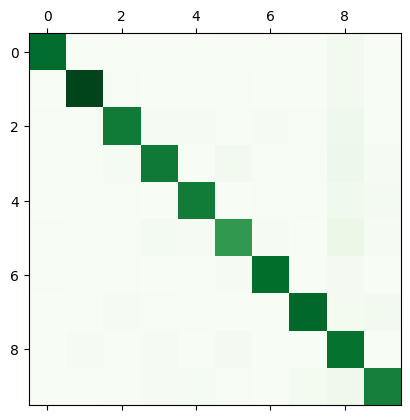

In [90]:
plt.matshow(conf_mx, cmap='Greens', alpha = 1.0)
plt.show()

#### Error Rates vs Absolute Error
Above is the absolute error, which is a measure of how often the result is wrong across the population of each classification option.  It appears that the classifier puts most of the images into the correct category, which is why the main diagonal is darker than the rest.  To focus the view, the goal is to look specifically at the errors and find out which areas are least performant in the model.  To accomplis this divide the total number of images classified in each entry in the confusion matrix by the total number of images for the specific class.  This will yeild a ratio of classified images to total images by classification type.  We also zero the diagon to remove correctly classified images and show the plot again.

In [92]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [93]:
norm_conf_mx = conf_mx/row_sums

In [94]:
np.fill_diagonal(norm_conf_mx, 0)

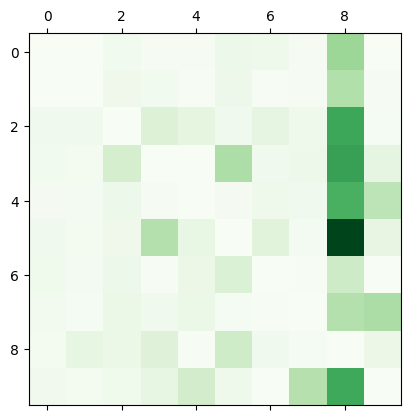

In [95]:
plt.matshow(norm_conf_mx, cmap='Greens', alpha=1.0)
plt.show()